In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
from matplotlib import animation
from IPython.display import HTML

In [3]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 12

In [4]:
# Set parameters.
L = 0.09  # length of the rod
nx = 51  # number of locations on the rod
dx = L / (nx - 1)  # distance between two consecutive locations
rho = 1490
k = 1.2
Cp = 1050
alpha = k/(rho*Cp) 

#rho = 50
#k = 0.04
#Cp = 850000
#alpha1 = k/(rho*Cp)  #  thermal diffusivity of the rod

# Define the locations along the rod.
x = numpy.linspace(0.0, L, num=nx)

# Set the initial temperature along the rod.
T0 = numpy.zeros(nx)
T0[:]=293
Tinf = 293
#T0[0] = 850

A = 0.1914
h = 30

boltzmann = 5.6704E-08

Qdot_in = 2500


print(alpha)

7.670182166826462e-07


In [5]:
def update_plot(n, T):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    T[n] : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2} \n'.format(n),y=0.96)
    line.set_ydata(T[n])

In [6]:
def ftcs_mixed_bcs(T0, nt, dt, dx, alpha):
    """
    Computes and returns the temperature along the rod
    after a provided number of time steps,
    given the initial temperature and the thermal diffusivity.
    The diffusion equation is integrated using forward 
    differencing in time and central differencing in space.
    The function uses a Dirichlet condition on the left side
    of the rod and a Neumann condition (zero-gradient) on the
    right side.
    
    Parameters
    ----------
    T0 : numpy.ndarray
        The initial temperature along the rod as a 1D array of floats.
    nt : integer
        The number of time steps to compute.
    dt : float
        The time-step size to integrate.
    dx : float
        The distance between two consecutive locations.
    alpha : float
        The thermal diffusivity of the rod.
    
    Returns
    -------
    T : numpy.ndarray
        The temperature along the rod as a 1D array of floats.
    """
    T = T0.copy()
    T_hist = [T0.copy()]
    sigma = alpha * dt / dx**2
    print(sigma)
    for n in range(nt):
        
        Qdot_out = boltzmann * A *(T[-1]**4-Tinf**4)+h*A*(T[-1]-Tinf)
        #print(Qdot_out)
        T[1:-1] = (T[1:-1] +
                   sigma * (T[2:] - 2.0 * T[1:-1] + T[:-2]))
        # Apply Neumann conditions.
        
        T[-1] = T[-1]+sigma*(T[-2]-T[-1]-heatfac * Qdot_out)
        
        T[0] = T[0]+sigma*(T[1]-T[0]+heatfac*Qdot_in)
        
        
        T_hist.append(T.copy())
    return T_hist

In [7]:
# Set the time-step size based on CFL limit.
#nt = 1000  # number of time steps to compute
sigma = 0.5
dt_stable = sigma * dx**2 / alpha  # time-step size
# Compute the temperature along the rod.
print(dt_stable)

1.46671875


In [8]:
# Set the time-step size based on CFL limit.
#nt = 1000  # number of time steps to compute
sigma = 0.5
dt = sigma * dx**2 / alpha  # time-step size

if dt>=1:
    dt = 1
else:
    dt = dt
    
Tfinal = 6*3600
nt = int(Tfinal/dt)
print(dt)
print(nt)

heatfac = dx/(k*A)
print(heatfac)


1
21600
0.006530825496342739


In [9]:
T = ftcs_mixed_bcs(T0, nt, dt, dx, alpha)

0.3408969851922872


In [10]:
Taa=numpy.array(T)

In [11]:
Taa

array([[ 293.        ,  293.        ,  293.        , ...,  293.        ,
         293.        ,  293.        ],
       [ 298.56584681,  293.        ,  293.        , ...,  293.        ,
         293.        ,  293.        ],
       [ 302.88112447,  294.8973804 ,  293.        , ...,  293.        ,
         293.        ,  293.        ],
       ...,
       [1366.23886225, 1349.91549835, 1333.59774425, ...,  588.26697251,
         572.14784395,  556.03044951],
       [1366.24077543, 1349.91741072, 1333.59965454, ...,  588.26761001,
         572.14843511,  556.03099395],
       [1366.24268819, 1349.91932265, 1333.60156441, ...,  588.26824737,
         572.14902614,  556.03153826]])

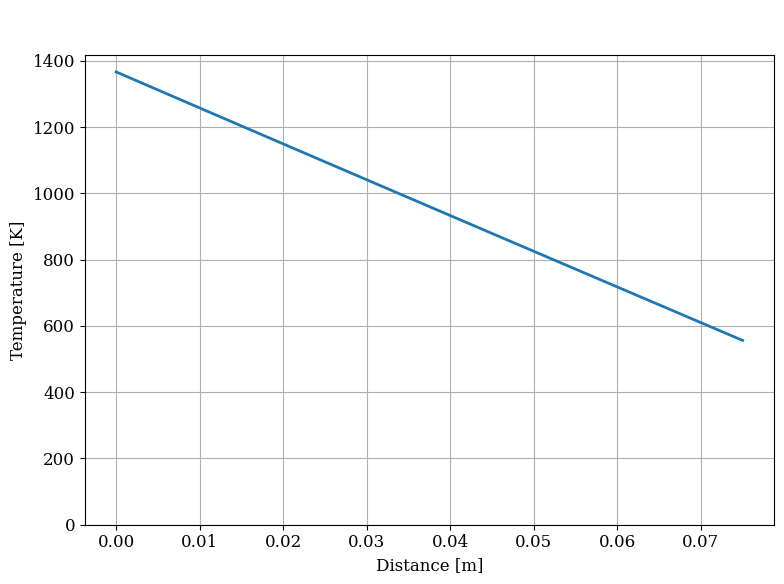

In [12]:
# Plot the initial traffic density.
fig = pyplot.figure(figsize=(8, 6.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [K]')
pyplot.title('\n')
pyplot.grid()
line = pyplot.plot(x, T[-1],
                   color='C0', linestyle='-', linewidth=2)[0]
#pyplot.xlim(0.0, L)
pyplot.ylim(0.0, T[-1][0]+50)
pyplot.tight_layout()

In [13]:
T[-1][0]

1366.2426881922243

In [14]:
T[-1][-1]

556.0315382563623

In [15]:
T[-1][0]-293.15

1073.0926881922242

In [16]:
T[-1][-1]-293.15

262.8815382563623

In [17]:
# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=len(T[::500]), fargs=(T[::500],),
                               interval=100)
# Display the video.
HTML(anim.to_html5_video())

In [18]:
# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='AndresMenes'),
                                bitrate=1800)
anim.save('temperature_explicit_kiln.gif', writer=writer)